It looks like our final two models are having a hard time with footwear (sneakers, ankle boots, and sandals) and dresses. That said, our models are all far better than random (10%), which is a good sign. With a bit more training, or some additional modification, we could probably improve the performance of these two models as well.

## 4. Exercises
For this week's exercises, we'll use the MNIST handwritten digit dataset. I'll load it in the cell below, and then in the following cells, you should answer the given question.

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1. In the following cell, print out the shapes of the training and test data. Make sure that you have an $n\times 28 \times 28$ array for the x values, and a length $n$ array for the y values. Print out the first 10 elements of each y array. (1 point)

In [8]:
print(x_train.shape) # 60,0000 images 28x28 pixels
print(len(x_train))  # 60,0000 labels
#display the labels 
y_train

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
print(x_test.shape) # 10,000 images 28x28 pixels
print(len(y_test))  # 10,0000 labels
#display the labels 
y_test

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

2. Normalize your test and training input data. Render two examples using the pyplot imshow() function. (2 points)

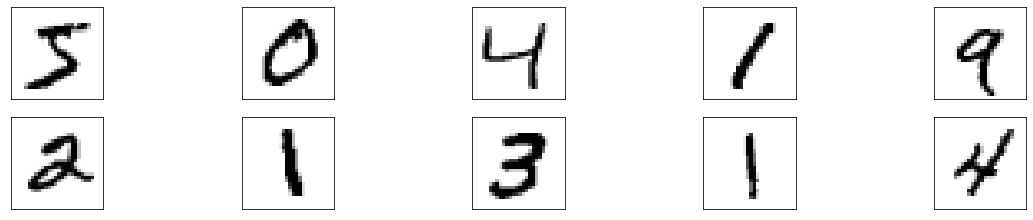

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#show first 50 train images  
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # plt.xlabel(classes[y_train[i]])
plt.show()

3. Create two neural network models for your handwritten digit recognition task. Each one should have 784 input neurons, and 10 output neurons. Your first model should have ReLU activations in the hidden layers, and a softmax output. Your second model should have Tanh activations in the hidden layers, and have a softmax output. (2 points)

In [5]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   # 784 input units
    keras.layers.Dense(128, activation=tf.nn.relu),  #ReLU activation
    keras.layers.Dense(128, activation=tf.nn.relu),  
    keras.layers.Dense(10, activation=tf.nn.softmax) # used for multi-classfication
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   
    keras.layers.Dense(128, activation=tf.nn.tanh),  # #sigmoid activation
    keras.layers.Dense(128, activation=tf.nn.tanh),  
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

4. Compile both models. When you do so, make sure that both models use the **Adam** optimizer. (2 points)

In [6]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

5. Train both models using the .fit() function. Test their accuracy on the test data. Which model is more accurate? (2 points)

In [7]:
import time

#Model1
start = time.time()
history1 =  model1.fit(x_train, y_train, epochs=20)
end = time.time()
print("Model 1 training time", end-start)

print("\n#################################################################################\n")

#Model2
start = time.time()
history2 = model2.fit(x_train, y_train, epochs=20)
end = time.time()
print("Model 2 training time", end-start)


print("\n################################################################################\n")

Epoch 1/20
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4068 - accuracy: 0.8801
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1003 - accuracy: 0.9694
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9789
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0483 - accuracy: 0.9849
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0377 - accuracy: 0.9871
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0303 - accuracy: 0.9897
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0224 - accuracy: 0.9926
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9936
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0160 - accuracy: 0.9947
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.017

6. Render two predicted objects. You should render the object using imshow(), and include both the predicted label, and the actual label. (1 point)

In [9]:
model1_predictions = model1.predict(x_test) #returns  array of probabilities
model2_predictions = model2.predict(x_test)

In [10]:
#image number 11 of test set
print(model1_predictions[10])
print("Predicted label",np.argmax(model1_predictions[10]))
print("Actual label",y_test[10])

[1.0000000e+00 1.8373058e-28 1.1413097e-13 4.3475211e-20 1.3450919e-24
 3.1458362e-23 4.3803611e-22 8.3789998e-15 2.1807275e-24 1.0301119e-14]
Predicted label 0
Actual label 0


In [11]:
#image number 11 of test set
print(model2_predictions[10])
print("Predicted label",np.argmax(model2_predictions[10]))
print("Actual label",y_test[10])

[9.9999976e-01 1.0741874e-13 4.6854531e-10 4.8240325e-11 1.2682995e-10
 1.3273050e-09 2.5520761e-10 7.8211283e-12 4.2669163e-11 2.2931219e-07]
Predicted label 0
Actual label 0


In [13]:

def plot_image(i, pred_array, true_label, img):
  classes  = [0,1,2,3,4,5,6,7,8,9]
  preds_array, true_label, img = pred_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(preds_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("Prediced Diigt: [{}] {:2.0f}% (Actual Digit: [{}])".format(classes[predicted_label],
                                100*np.max(preds_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, pred_array, true_label):
  preds_array, true_label = pred_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), preds_array, color="#FFFF00")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(preds_array)
 
  thisplot[predicted_label].set_color('yellow')
  thisplot[true_label].set_color('blue')

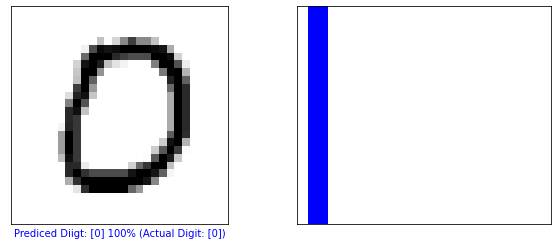

In [14]:
i = 10 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i, model1_predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, model1_predictions,  y_test)
plt.show()

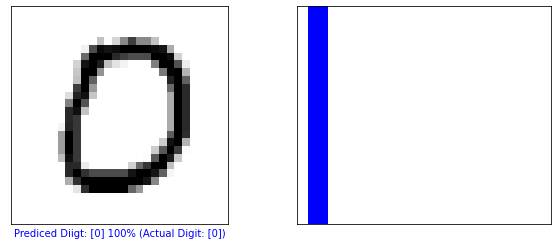

In [16]:
#model 2 prediction for image 11 of test set
i = 10 #image number 14 of test set
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_image(i, model2_predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, model2_predictions,  y_test)
plt.show()